In [1]:
'''
Problem Statements: 1.	A cloth manufacturing company is interested to know about the different attributes contributing to high sales.
Build a decision tree & random forest model with Sales as target variable (first convert it into categorical variable).

1.1.	What is the business objective?
A cloth manufacturing company seeks to understand which attributes significantly contribute to high sales. '
By building a Decision Tree and Random Forest model with "Sales" as the target variable

1.2 	Are there any constraints?
Incomplete or noisy data may affect model accuracy.
If the "high sales" class is underrepresented, model performance might skew toward majority classes.
Random Forest models require significant computational power for large datasets or high numbers of trees.

'''

'\nProblem Statements: 1.\tA cloth manufacturing company is interested to know about the different attributes contributing to high sales.\nBuild a decision tree & random forest model with Sales as target variable (first convert it into categorical variable).\n\n1.1.\tWhat is the business objective?\nA cloth manufacturing company seeks to understand which attributes significantly contribute to high sales. \'\nBy building a Decision Tree and Random Forest model with "Sales" as the target variable\n\n1.2 \tAre there any constraints?\nIncomplete or noisy data may affect model accuracy.\nIf the "high sales" class is underrepresented, model performance might skew toward majority classes.\nRandom Forest models require significant computational power for large datasets or high numbers of trees.\n\n'

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('Company_Data.csv')

In [39]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [40]:
#EDA

In [41]:
# Display the first few rows of the dataset
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
#NO NULL DATA

In [10]:
#now lets work on our data

In [11]:
# Convert Sales into a categorical variable
data['Sales'] = pd.cut(data['Sales'], bins=[0, 7.5, 10, 15], labels=['Low', 'Medium', 'High'])

In [17]:
#AGAIN AFTER THIS WE HAVE TO CHECK IF IT HAVE ADJUCTSED SOME VALUES AS NAN

In [18]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Sales          3
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


In [19]:
#so  the sales values are having 3 NULL values lets  drop them

In [20]:
data = data.dropna()

In [21]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [22]:
#NOW NO NULL VALUES THERE

In [23]:
# Split the data into features and target variable
X = data.drop('Sales', axis=1)
y = data['Sales']

In [24]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Build the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Predict the target variable for the test set
y_pred_dt = dt_model.predict(X_test)

In [28]:
# Evaluate the Decision Tree model
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Model Accuracy: 0.5166666666666667
Classification Report:
               precision    recall  f1-score   support

        High       0.39      0.48      0.43        23
         Low       0.74      0.68      0.71        59
      Medium       0.29      0.29      0.29        38

    accuracy                           0.52       120
   macro avg       0.47      0.48      0.48       120
weighted avg       0.53      0.52      0.52       120

Confusion Matrix:
 [[11  1 11]
 [ 3 40 16]
 [14 13 11]]


In [31]:
# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predict the target variable for the test set
y_pred_rf = rf_model.predict(X_test)

In [33]:
# Evaluate the Random Forest model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.6916666666666667
Classification Report:
               precision    recall  f1-score   support

        High       0.72      0.57      0.63        23
         Low       0.76      0.92      0.83        59
      Medium       0.52      0.42      0.46        38

    accuracy                           0.69       120
   macro avg       0.67      0.63      0.64       120
weighted avg       0.68      0.69      0.68       120

Confusion Matrix:
 [[13  0 10]
 [ 0 54  5]
 [ 5 17 16]]


In [34]:
# Plot feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

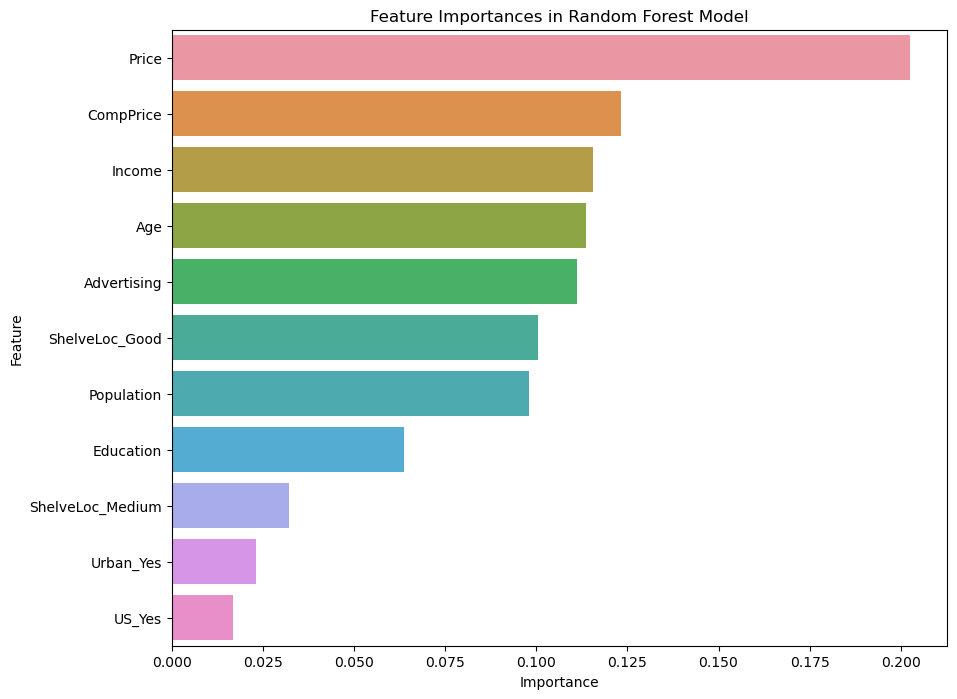

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [36]:
#5.4 	Briefly explain the model output in the documentation. 
'''
Feature Importances Highlights which features contribute most to the model's predictions.

Decision Tree Model: Indicates how well the model predicts the correct sales category
Provides precision, recall, and F1-score for each sales category.

Random Forest Model: Similar to the Decision Tree, it provides precision, recall, andF1-score but generally with better performance 
due to the ensemble method.
its confusion matrix helps in understanding the prediction errors.
'''

"\nFeature Importances Highlights which features contribute most to the model's predictions.\n\nDecision Tree Model: Indicates how well the model predicts the correct sales category\nProvides precision, recall, and F1-score for each sales category.\n\nRandom Forest Model: Similar to the Decision Tree, it provides precision, recall, andF1-score but generally with better performance \ndue to the ensemble method.\nits confusion matrix helps in understanding the prediction errors.\n"

In [ ]:
#6.	Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided?
'''
1.Identification of Key Sales Drivers
2.Optimized Marketing and Sales Strategies by understanding the key roles of those given various factorvss.
3.Competitive Advantage
'''